In [1]:
from data_cleaner import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# load in the data
name_basics = pd.read_csv('name.basics.csv')
alt_title_names = pd.read_csv('title.akas.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Question 1: Average voter rating and popularity vs gross
## Merge important dataframes

In [3]:
# rename column key in movie_budgets to match key in tmdb_movies
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)

In [4]:
# create new dataframe and assign it to the merging of tmdb_movies and movie_budgets
movie_financials_and_popularity = pd.merge(movie_budgets, tmdb_movies, on='title') # use title as merging key

In [5]:
# drop duplicated or irrelevant columns
movie_financials_and_popularity.drop(columns=['genre_ids', 'original_title', 'id_x',
                                              'original_language', 'release_date_y', 'Unnamed: 0'], inplace=True)
movie_financials_and_popularity.rename(columns={'release_date_x': 'release_date'}, inplace=True)
movie_financials_and_popularity.head() # print dataframe to check that merging and dropping worked correctly

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",141052,34.953,6.2,7510


## Clean data to get money values to integers

In [6]:
# call function made to clean data
money_values_to_integer(movie_financials_and_popularity, 'production_budget')
money_values_to_integer(movie_financials_and_popularity, 'domestic_gross')
money_values_to_integer(movie_financials_and_popularity, 'worldwide_gross')

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,141052,34.953,6.2,7510
...,...,...,...,...,...,...,...,...,...
2380,"Sep 1, 2015",Exeter,25000,0,489792,226458,5.934,4.7,121
2381,"Apr 21, 2015",Ten,25000,0,0,279516,1.575,5.4,5
2382,"Dec 31, 2014",Dry Spell,22000,0,0,255266,0.600,6.0,1
2383,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,86304,2.078,3.9,19


In [7]:
# drop movies with low gross and low viewer interaction
drop_by_less_than_equal_to(movie_financials_and_popularity, 'worldwide_gross', 10000000)
drop_by_less_than_equal_to(movie_financials_and_popularity, 'vote_count', 100)

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,141052,34.953,6.2,7510
...,...,...,...,...,...,...,...,...,...
2176,"Sep 25, 2015",The Green Inferno,1000000,7192291,12931420,171424,13.670,5.2,619
2178,"Oct 19, 2012",The Sessions,1000000,6002451,11495204,113947,6.460,6.9,296
2223,"Jul 12, 2013",Fruitvale Station,900000,16098998,17549645,157354,9.587,7.4,645
2253,"Nov 15, 1974",Benji,500000,31559560,31559560,495193,10.503,7.0,138


In [8]:
# remove duplicate movies
movie_financials_and_popularity.drop_duplicates(subset=('id_y'), inplace=True)
movie_financials_and_popularity.drop_duplicates(subset=('title'), inplace=True)

In [9]:
# remove data with no numbers or low values for worldwide gross and vote count
movies_to_remove = movie_financials_and_popularity.loc[(movie_financials_and_popularity['worldwide_gross'] <= 10000000) 
                                                       | (movie_financials_and_popularity['vote_count'] <= 100)]
movie_financials_and_popularity.drop(index=movies_to_remove.index, inplace=True)

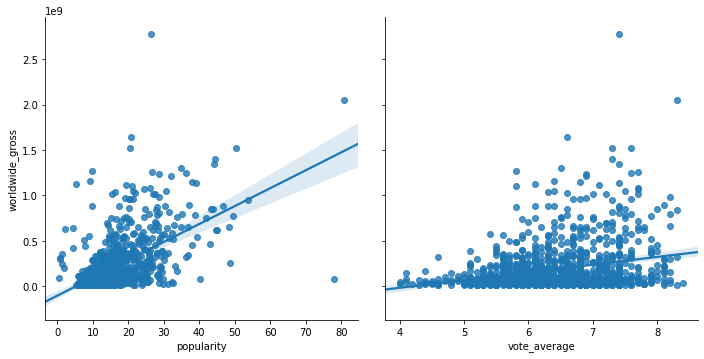

In [10]:
# create a pair plot with the relevant data
sns.pairplot(movie_financials_and_popularity, y_vars=['worldwide_gross'],
             x_vars=['popularity', 'vote_average'], kind='reg', height=5)

# Question 2: Effect of different actors and directors on profitability

In [11]:
new_name_basics = name_basics[['nconst', 'primary_name', 'primary_profession']].copy()
#new_basic_title = title_basics[['tconst', 'primary_title']]
new_crew_title = title_crew[['tconst', 'directors', 'writers']].copy()
new_principals_title = title_principals[['tconst', 'nconst']].copy()
#new_ratings_title = title_ratings[['tconst', 'averagerating', 'numvotes']]
title_alias = alt_title_names[['title_id', 'title', 'region']].copy()

In [12]:
# change title id column name to standard name; drop any non-US versions of titles
title_alias.rename(columns={'title_id': 'tconst'})
title_alias.dropna(inplace=True)
drop_by_not_equal(title_alias, 'region', 'US')

,title_id,title,region
12,tt0369610,Jurassic World 3D,US
20,tt0369610,Jurassic World,US
21,tt0369610,Ebb Tide,US
28,tt0369610,Jurassic Park IV,US
37,tt0369610,Jurassic Park 4,US
...,...,...,...
331645,tt9310460,Coconut the Little Dragon 2 Into the Jungle,US
331654,tt9358044,Hail Satan?,US
331673,tt9562694,Alien Warfare,US
331686,tt9705860,Dusan Vukotic Croatian Oscar Winner,US


In [13]:
# drop all duplicated title names from budget dataframe
movie_budgets.drop_duplicates(subset='title', inplace=True)
movie_budgets['title'].value_counts()

The Hunting Party                1
Breathless                       1
Bad Moms                         1
Cheaper by the Dozen             1
Tron                             1
                                ..
Double Impact                    1
The Perfect Storm                1
For Love of the Game             1
The Claim                        1
The Legend of the Lone Ranger    1
Name: title, Length: 5698, dtype: int64

In [14]:
# convert columns of money from objects to integers, create a column for a standardized profit value
money_values_to_integer(movie_budgets, 'production_budget')
money_values_to_integer(movie_budgets, 'worldwide_gross')
movie_budgets['profitability'] = movie_budgets['worldwide_gross']/movie_budgets['production_budget']

In [15]:
# combine the movie budgets and 
budgets_and_aliases = pd.merge(title_alias, movie_budgets, on='title')

In [16]:
# drop any movies that grossed less than $10M
drop_by_less_than_equal_to(budgets_and_aliases, 'worldwide_gross', 10000000)

,title_id,title,region,id,release_date,production_budget,domestic_gross,worldwide_gross,profitability
0,tt0369610,Jurassic World,US,34,"Jun 12, 2015",215000000.0,"$652,270,625",1.648855e+09,7.669092
1,tt0401729,John Carter,US,14,"Mar 9, 2012",275000000.0,"$73,058,679",2.827781e+08,1.028284
2,tt1014759,Alice in Wonderland,US,51,"Mar 5, 2010",200000000.0,"$334,191,110",1.025491e+09,5.127456
3,tt1926979,Alice in Wonderland,US,51,"Mar 5, 2010",200000000.0,"$334,191,110",1.025491e+09,5.127456
4,tt2049386,Alice in Wonderland,US,51,"Mar 5, 2010",200000000.0,"$334,191,110",1.025491e+09,5.127456
...,...,...,...,...,...,...,...,...,...
2218,tt3829266,The Predator,US,84,"Sep 14, 2018",86000000.0,"$51,024,708",1.487153e+08,1.729248
2219,tt4651520,Bad Moms,US,99,"Jul 29, 2016",20000000.0,"$113,257,297",5.639816e+07,2.819908
2220,tt5462602,The Big Sick,US,64,"Jun 23, 2017",5000000.0,"$42,872,467",1.223263e+07,2.446526
2222,tt6139732,Aladdin,US,81,"May 24, 2019",182000000.0,"$246,734,314",6.192343e+08,3.402386


In [17]:
# create a new dataframe with only relevant columns
gross_and_titles = budgets_and_aliases[['title_id', 'title', 'worldwide_gross', 'profitability']].copy()

In [18]:
# drop all duplicated movies and check that the function worked
gross_and_titles.drop_duplicates(subset='title', inplace=True)
gross_and_titles['title'].value_counts()

Goosebumps                1
Paranormal Activity 3     1
The Lego Ninjago Movie    1
The Last Airbender        1
Tammy                     1
                         ..
The 5th Wave              1
The Man                   1
G.I. Joe: Retaliation     1
Amour                     1
Lady Bird                 1
Name: title, Length: 1235, dtype: int64

In [19]:
# make sure the dataframes to merge have the same column name for merge point
title_crew.rename(columns={'tconst': 'title_id'}, inplace=True)
title_crew.dropna(inplace=True)
title_crew.groupby(by='title_id')
# merge crew info with main dataframe
crew_and_gross = pd.merge(title_crew, gross_and_titles, on='title_id')
crew_and_gross

,title_id,directors,writers,title,worldwide_gross,profitability
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544
2,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068
3,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957
4,tt1411664,nm0103744,"nm0001191,nm0184445,nm0841910",Bucky Larson: Born to Be a Star,42226657.0,4.222666
...,...,...,...,...,...,...
1189,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN
1190,tt3464902,nm0487166,"nm0487166,nm3328207",The Lobster,36000000.0,9.000000
1191,tt7368554,nm0838499,"nm0503931,nm0838499",The Interpreter,157092943.0,1.745477
1192,tt7634968,nm0788202,"nm1202276,nm0404752,nm0339733,nm1944708,nm0326...",What Men Want,44821299.0,2.241065


In [20]:
# rename directors and nconst columns to the standard column name
crew_and_gross.rename(columns={'directors': 'nameconstant'}, inplace=True)
new_name_basics.rename(columns={'nconst': 'nameconstant'}, inplace=True)
# merge name basics into the main dataframe
crew_names_and_gross = pd.merge(crew_and_gross, new_name_basics, on='nameconstant')
crew_names_and_gross

,title_id,nameconstant,writers,title,worldwide_gross,profitability,primary_name,primary_profession
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001,Rod Lurie,"writer,director,producer"
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544,Taylor Hackford,"producer,director,writer"
2,tt1904996,nm0000431,"nm0572352,nm0922799",Parker,24405825.0,0.697309,Taylor Hackford,"producer,director,writer"
3,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068,Roger Michell,"director,producer,actor"
4,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957,Adam Shankman,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...
1092,tt1741273,nm0712753,"nm0712753,nm0002728,nm3160078",Secret in Their Eyes,16612072.0,0.830604,Billy Ray,"writer,director,producer"
1093,tt2467046,nm0002184,"nm0420874,nm0481542,nm0482510,nm1146036",Left Behind,41382841.0,2.299047,Vic Armstrong,"stunts,assistant_director,actor"
1094,tt3148952,nm0369442,"nm0369442,nm2789152,nm2319441,nm2497348",The Circle,27147349.0,1.508186,Stefan Haupt,"director,writer,producer"
1095,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN,Kirk Loudon,"writer,director,editor"


In [21]:
# group new dataframe by director's name and drop any rows with na values
profitability_by_director = crew_names_and_gross.groupby(by='primary_name').mean()
profitability_by_director.dropna(inplace=True)

In [22]:
# create series of counts of movies made by each director
number_of_movies_by_director = crew_names_and_gross.groupby(by='primary_name').size()
number_of_movies_by_director.dropna(inplace=True)
# add number of movies series to the main dataframe
profitability_by_director['num_of_movies'] = number_of_movies_by_director

In [23]:
# exclude any director to make less than 2 movies in dataframe to avoid outliers and less predictable performances
multi_movie_directors = profitability_by_director.loc[profitability_by_director['num_of_movies'] >= 2].copy()
multi_movie_directors.sort_values(by='profitability', ascending=False, inplace=True)
# make the director column names more readable
clean_director_columns(multi_movie_directors)

,Director,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,Sam Raimi,2.571265e+08,49.013898,2
1,Ryan Coogler,6.913817e+08,32.124904,2
2,James Gray,2.579304e+08,12.019347,3
3,Lee Daniels,2.067881e+08,9.029198,2
4,David Frankel,3.275505e+08,9.012066,2
...,...,...,...,...
189,Robert Luketic,4.318747e+07,0.762678,2
190,Rob Reiner,1.451371e+07,0.762361,2
191,Wes Craven,2.542130e+07,0.758725,2
192,Paul W.S. Anderson,2.453416e+07,0.446459,2


In [24]:
# create a dataframe of the 20 directors with the highest average profitability
top_multi_movie_directors = multi_movie_directors.iloc[0:20]

Text(0.5, 1.0, 'Director vs Average Profit')

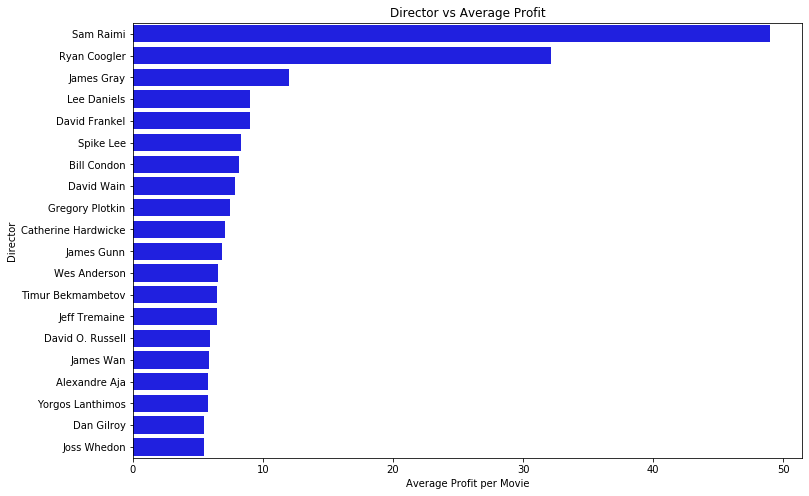

In [25]:
# make a bar graph to easily display the most profitable directors and how profitable they are on average
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Director', x='Average Profit per Movie', data=top_multi_movie_directors, color='b')
plt.title('Director vs Average Profit')

In [26]:
# print descriptive information on the overall list of directors profitability and worldwide gross
multi_movie_directors['Average Worldwide Box Office'] = multi_movie_directors['Average Worldwide Box Office'].astype('int64').copy()
multi_movie_directors.describe()

,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
count,1.940000e+02,194.000000,194.000000
mean,2.107219e+08,3.480135,2.530928
std,2.164023e+08,4.274090,0.917065
min,1.055142e+07,0.117238,2.000000
25%,5.962061e+07,1.911900,2.000000
50%,1.394859e+08,2.647723,2.000000
75%,2.734396e+08,3.809872,3.000000
max,1.460475e+09,49.013898,7.000000


Text(0.5, 1.0, 'Profit per Movie for Directors')

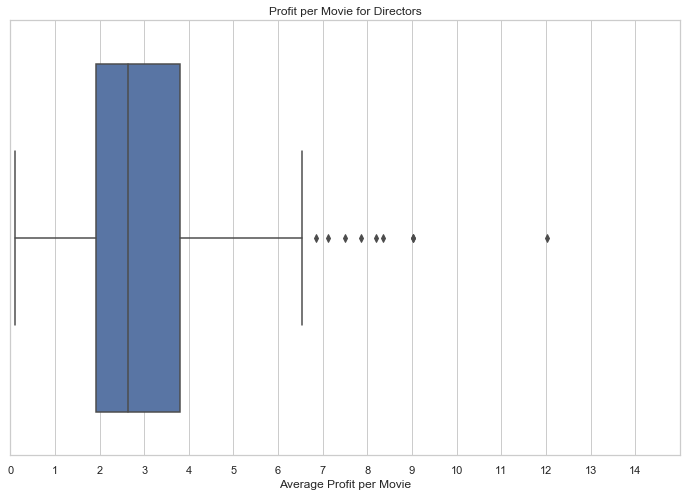

In [27]:
# create a bargraph to visualize the table printed above
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
ax = sns.boxplot(x=multi_movie_directors['Average Profit per Movie'])
plt.xlim(right=15, left=0)
plt.xticks(range(0,15))
plt.title('Profit per Movie for Directors')

## Actors

In [28]:
# set title principals column names to the standard names
new_principals_title.rename(columns={'tconst': 'title_id', 'nconst': 'nameconstant'}, inplace=True)
new_principals_title.dropna(inplace=True)

In [29]:
# merge title principals with the main dataframe, then merge with name basics dataframe
principals_and_gross = pd.merge(new_principals_title, gross_and_titles, on='title_id')
principal_names_and_gross = pd.merge(principals_and_gross, new_name_basics, on='nameconstant')

In [30]:
# set primary profession column to a string and filter out anyone who is not an actor or actress
principal_names_and_gross['primary_profession'].astype('str')
actor_names_and_gross = principal_names_and_gross.loc[(principal_names_and_gross['primary_profession'].str.contains(pat='actor'))
                                                      | (principal_names_and_gross['primary_profession'].str.contains(pat='actress'))].copy()

In [31]:
# sort the dataframe by actor's name and drop any na values
profitability_by_actor = actor_names_and_gross.groupby(by='primary_name').mean()
profitability_by_actor.dropna(inplace=True)

In [32]:
# create series of counts of movies made by each director
number_of_movies_by_actor = actor_names_and_gross.groupby(by='primary_name').size()
number_of_movies_by_actor.dropna(inplace=True)
# merge movie count series with main dataframe
profitability_by_actor['num_of_movies'] = number_of_movies_by_actor

In [33]:
# remove any actors appearing in less than 3 movies to exclude less predictable data points
# and sort by profitability
multi_movie_actors = profitability_by_actor.loc[(profitability_by_actor['num_of_movies'] >= 3)].copy()
multi_movie_actors.sort_values(by='profitability', ascending=False, inplace=True)
# set the column names to something more readable
clean_actor_columns(multi_movie_actors)

,Actor,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,Dan Stevens,7.443914e+08,26.595277,3
1,Michelle Williams,1.431295e+08,21.091803,5
2,Rachel Weisz,1.402361e+08,18.631898,6
3,Octavia Spencer,9.093804e+07,17.719846,4
4,Dermot Mulroney,1.182542e+08,15.772292,3
...,...,...,...,...
552,Eric Bana,3.462937e+07,0.990169,3
553,Ron Perlman,1.668403e+08,0.970240,4
554,Andrew Macdonald,2.253992e+07,0.903110,3
555,Abbie Cornish,7.301534e+07,0.860702,4


In [34]:
# create a dataframe of the top 20 actors by profitability
top_multi_movie_actors = multi_movie_actors.iloc[0:20].copy()

Text(0.5, 1.0, 'Actor vs Average Profit')

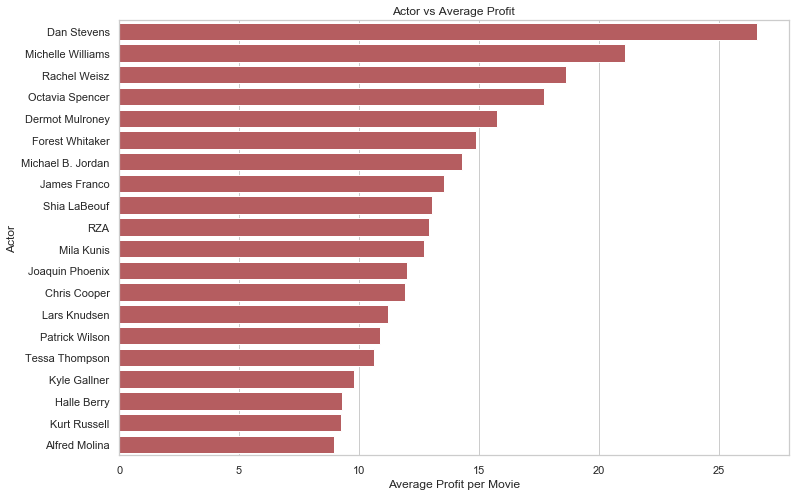

In [35]:
# create a barplot of the top 20 actors by profitability
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Actor', x='Average Profit per Movie', data=top_multi_movie_actors, color='r')
plt.title('Actor vs Average Profit')

In [36]:
# print a table of basic information for the data set of actors
multi_movie_actors.describe()

,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
count,5.570000e+02,557.000000,557.000000
mean,2.220497e+08,3.613492,4.820467
std,1.716674e+08,2.552801,2.479429
min,1.591161e+07,0.610757,3.000000
25%,9.523055e+07,2.284559,3.000000
50%,1.795922e+08,2.971061,4.000000
75%,2.899794e+08,4.007731,6.000000
max,1.031005e+09,26.595277,17.000000


Text(0.5, 1.0, 'Profit per Movie for Actors')

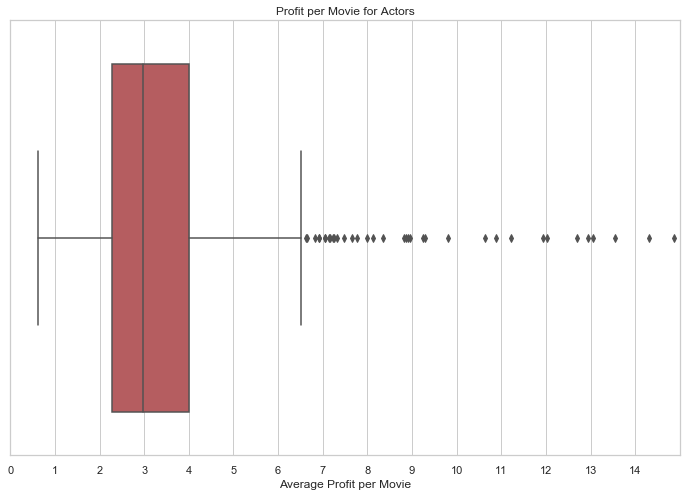

In [37]:
# create a boxplot to easily visualize the table printed above
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
ax = sns.boxplot(x=multi_movie_actors['Average Profit per Movie'], color='r')
plt.xlim(right=15, left=0)
plt.xticks(range(0,15))
plt.title('Profit per Movie for Actors')

# Question 3: How often are low budget movies profitable?

In [46]:
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

In [50]:
money_values_to_integer(movie_budgets, 'production_budget')
money_values_to_integer(movie_budgets, 'domestic_gross')
money_values_to_integer(movie_budgets, 'worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [51]:
# Verify domestic, worldwide gross columns = integeres
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [52]:
# Let's clean data to clearly see ascending budget and create column which calculates profit
movie_budgets['profitability'] = movie_budgets['worldwide_gross'] / movie_budgets['production_budget']
movie_budgets.sort_values(['production_budget'], axis=0, inplace=True)
movie_budgets.head()
movie_budgets.round({'profitability':2})

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,164.58
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0.27
5778,79,"Apr 2, 1999",Following,6000,48482,240495,40.08
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0.13
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.15
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,4.24
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,0.43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.55


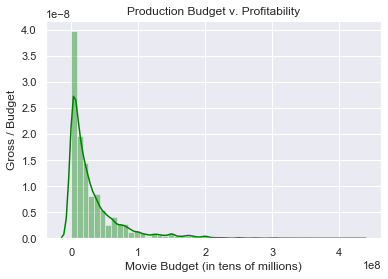

In [54]:
# Let's visualize the distribution of low budget movies that return profit
sns.set(style='darkgrid')
sns.set_context('notebook', font_scale=1)
plt.title('Production Budget v. Profitability')
plt.ylabel('Gross / Budget')
sns.distplot(movie_budgets['production_budget'], color= 'green', axlabel= 'Movie Budget (in tens of millions)')